# Numerical Analysis - IMPA 2020
### Professor Dan Marchesin
### Hallison Paz, 1st year Phd student

# Solving Linear Systems
-------

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interact_manual

In [75]:
MAX_ITER = 1000
ERROR_TOL = 1e-15

## Jacobi Method

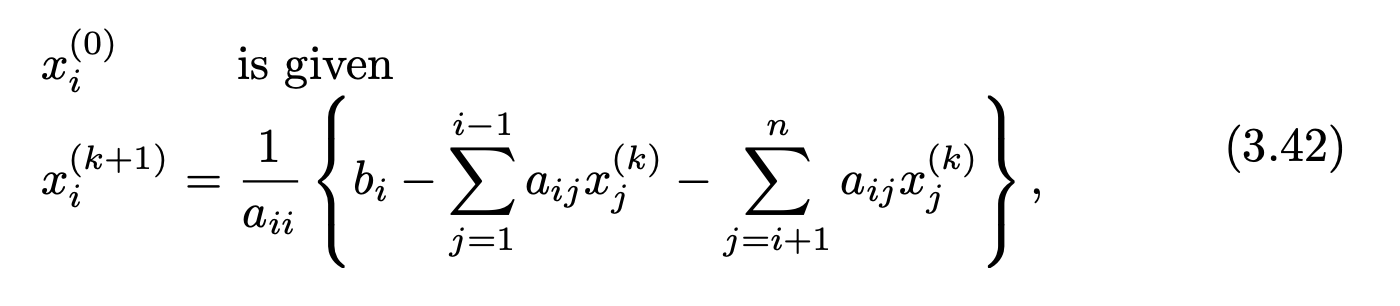

In [87]:
def should_stop(old, new):
    return np.sum((new-old)**2)/len(new) < ERROR_TOL
    
def jacobi(A, b, x=None, max_iter=MAX_ITER, verbose=False):
    x = np.zeros(b) if x is None else x
    last_iter = max_iter
    for k in range(max_iter):
        old = np.copy(x)
        for i in range(len(x)):
            s = np.sum([A[i][j]*old[j] for j in range(len(x)) if j != i])
            x[i] = (b[i] - s)/A[i][i]
        
        if should_stop(old, x):
            last_iter = k+1
            break
    if last_iter == max_iter:
        print("Solution did not reach tolerance")
    if verbose:
        return x, last_iter
    return x

## Gauss-Seidel Method

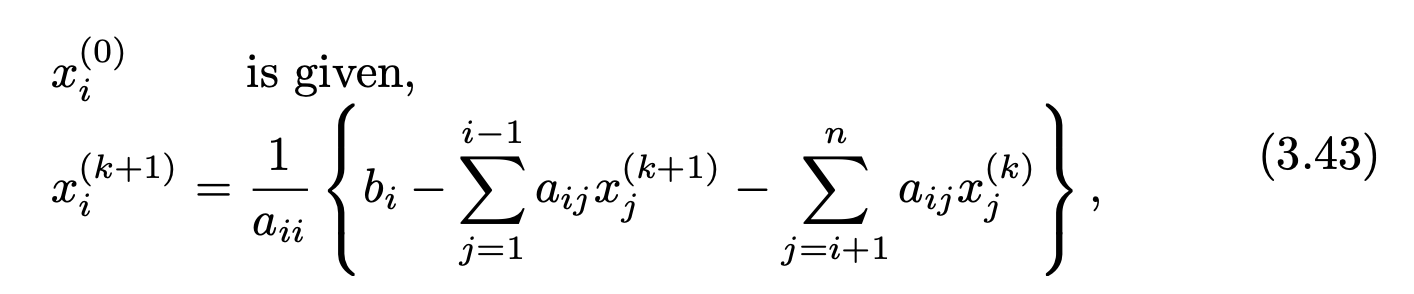

In [88]:
def gauss_seidel(A, b, x=None, max_iter=MAX_ITER, verbose=False):
    x = np.zeros(b) if x is None else x
    last_iter = max_iter
    for k in range(max_iter):
        old = np.copy(x)
        for i in range(len(x)):
            s = np.sum([A[i][j]*x[j] for j in range(len(x)) if j != i])
            x[i] = (b[i] - s)/A[i][i]
        
        if should_stop(old, x):
            last_iter = k+1
            break
    if last_iter == max_iter:
        print("Solution did not reach tolerance")
    if verbose:
        return x, last_iter
        
    return x

## Successive Overrelaxation Method
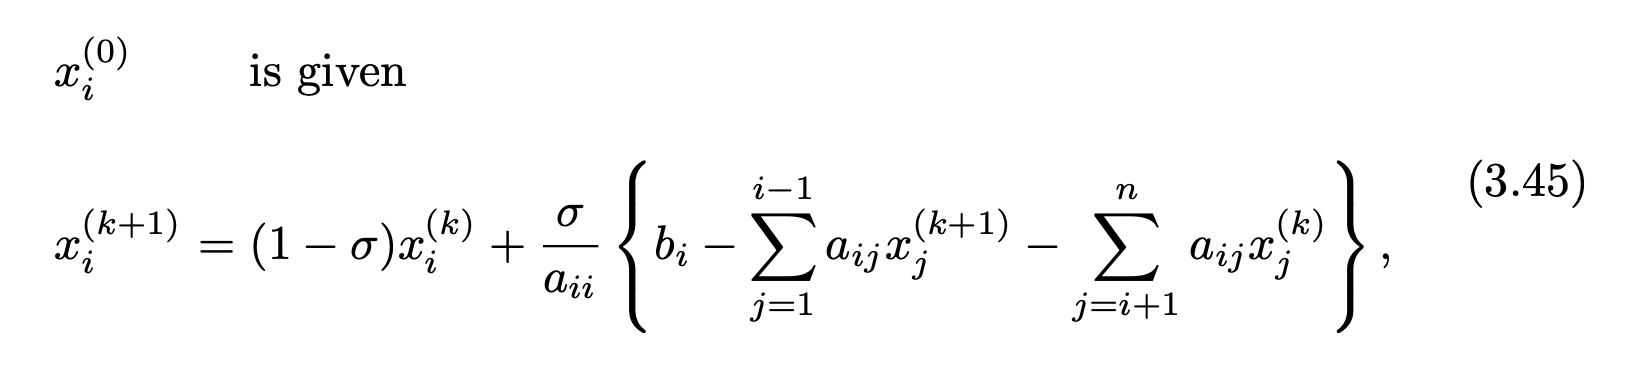

In [89]:
def SOR(A, b, x=None, sigma=0.5, max_iter=MAX_ITER, verbose=False):
    x = np.zeros(b) if x is None else x
    last_iter = max_iter
    for k in range(max_iter):
        old = np.copy(x)
        for i in range(len(x)):
            s = np.sum([A[i][j]*x[j] for j in range(len(x)) if j != i])
            x[i] = (1-sigma)*old[i] + sigma*(b[i] - s)/A[i][i]
        
        if should_stop(old, x):
            last_iter = k+1
            break
    if last_iter == max_iter:
        print("Solution did not reach tolerance")
    if verbose:
        return x, last_iter
    
    return x

## Factoring the Matrix

In [90]:
def split_matrix(A):
    L = np.tril(A, -1)
    D = np.zeros(A.shape)
    np.fill_diagonal(D, np.diag(A))
    U = np.triu(A, 1)
    return L, D, U

def spectral_radius(M):
    eig, _ = np.linalg.eig(M)
    return np.abs(eig).max()

def jacobi_iteration_matrix(A):
    L, D, U = split_matrix(A)
    v1 = -np.linalg.inv(D)
    v2 = L + U
    _MN = np.matmul(v1, v2)
    return _MN

## Example Tests

In [91]:
def test1():
    A = np.array([[2, 1], 
                 [-1, 3]])
    b = np.array([3, 2])
    x = np.array([0, 0])
    print('Jacobi')
    sol = jacobi(A, b, x)
    print('Solution: ', sol)
    print('-------')
    print('Gauss-Seidel')
    sol = gauss_seidel(A, b, x)
    print('Solution: ', sol)
    print('-------')
    print('SOR')
    sol = SOR(A, b, x, sigma=0.5)
    print('Solution: ', sol)
    print('-------')


In [92]:
test1()

Jacobi
Solution:  [1 1]
-------
Gauss-Seidel
Solution:  [1 1]
-------
SOR
Solution:  [1 1]
-------


In [108]:
def compare_solutions(A, b, x, sigma=0.5):
    radius = spectral_radius(jacobi_iteration_matrix(A))
    print('Spectral radius: ', radius)
    if radius < 1.0:
        print("Jacobi method is convergent for this problem")
    else:
        print("Jacobi method is NOT convergent for this problem")
    
    # Computes solution and number of steps
    jac, jac_steps = jacobi(A, b, x, verbose=True)
    gsl, gsl_steps = gauss_seidel(A, b, x, verbose=True)
    sor, sor_steps = SOR(A, b, x, sigma=sigma, verbose=True)

    # Formats values 'naming' them
    data = {'steps': [jac_steps, gsl_steps, sor_steps]}
    for i in range(len(x)):
        data['x{}'.format(i+1)] = [str(jac[i]), str(gsl[i]), str(sor[i])]
    
    # Creates pandas DataFrame 
    df = pd.DataFrame(data, index =['Jacobi', 'Gauss Seidel', 'SOR sig={}'.format(sigma)])
    return df

In [100]:
def test_a():
    A = np.array([
        [10, 1, 2, 3, 4],
        [1, 9, -1, 2, -3],
        [2, -1, 7, 3, -5],
        [3, 2, 3, 12, -1],
        [4, -3, -5, -1, 15]
    ])
    b = np.array([12, -27, 14, -17, 12])
    x = np.zeros(len(b))
    
    df = compare_solutions(A, b, x)
    display(df)
    
def test_b():
    A = np.array([
        [4, 1, 1],
        [1, -7, 2],
        [3, 0, 4]
    ])
    b = np.array([7, -2, 11])
    x = np.zeros(len(b))
    
    df = compare_solutions(A, b, x)
    display(df)
    
def test_c():
    A = np.array([
        [1, 0, 1],
        [-1, 1, 0],
        [1, 2, -3]
    ])
    b = np.array([0, 0, 0])
    x = np.zeros(len(b))
    
    df = compare_solutions(A, b, x)
    display(df)
    

In [109]:
test_a()

Spectral radius:  0.8267862138566946
Jacobi method is convergent for this problem


,steps,x1,x2,x3,x4,x5
Jacobi,81,1.000000081474822,-2.0000000714762884,2.9999998730828468,-1.999999983914238,0.9999999162592988
Gauss Seidel,1,1.000000081474822,-2.0000000714762884,2.9999998730828468,-1.999999983914238,0.9999999162592988
SOR sig=0.5,1,1.000000081474822,-2.0000000714762884,2.9999998730828468,-1.999999983914238,0.9999999162592988


In [110]:
test_b()

Spectral radius:  0.5073274012204291
Jacobi method is convergent for this problem


,steps,x1,x2,x3
Jacobi,25,1.0000000063413836,0.9999999962373616,1.9999999941247468
Gauss Seidel,1,1.0000000063413836,0.9999999962373616,1.9999999941247468
SOR sig=0.5,1,1.0000000063413836,0.9999999962373616,1.9999999941247468


In [111]:
test_c()

Spectral radius:  0.9444378697709911
Jacobi method is convergent for this problem


,steps,x1,x2,x3
Jacobi,1,0.0,0.0,-0.0
Gauss Seidel,1,0.0,0.0,-0.0
SOR sig=0.5,1,0.0,0.0,-0.0
